<a href="https://colab.research.google.com/github/overred0704/direction_valve_monitor/blob/main/spc%20analyze%20v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
h1 = pd.read_csv('/content/drive/MyDrive/金屬中心/能專/資料/batch_times_april.csv')

In [ ]:
d1 = pd.read_csv('/content/drive/MyDrive/金屬中心/能專/資料/rawdata.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
h1 = h1.drop('Unnamed: 0', axis=1)
d1 = d1.drop('Unnamed: 0', axis=1)

In [ ]:
h1

,start_day,start_time,end_day,end_time
0,2021/4/1,01:47,2021/4/1,03:05
1,2021/4/1,03:05,2021/4/1,04:23
2,2021/4/1,04:23,2021/4/1,05:40
3,2021/4/1,05:41,2021/4/1,06:42
4,2021/4/1,06:42,2021/4/1,07:27
...,...,...,...,...
1110,2021/5/31,21:25,2021/5/31,21:55
1111,2021/5/31,21:55,2021/5/31,22:26
1112,2021/5/31,22:27,2021/5/31,22:57
1113,2021/5/31,22:58,2021/5/31,23:29


In [ ]:
d1

,date,time,掃氣時間(sec),點火穩定時間(sec),換向時間(sec),洩壓閥洩壓壓力(Pa),目標爐壓(Pa),停機爐壓(Pa),目標爐溫(℃),換向閥溫度(℃),換向閥停機溫度(℃),摻冷風溫度(℃),引風機停機溫度(℃),FGR溫度(℃),引風伺服閥開度(),M1伺服閥開度(),M2伺服閥開度(),M3伺服閥開度(),M4伺服閥開度(),持溫時間(),1080烘爐時間(),引風伺服閥開度(%),M1伺服閥開度(%),M2伺服閥開度(%),M3伺服閥開度(%),M4伺服閥開度(%),#2爐壓(Pa),平均爐壓(Pa),#1爐門開關(),#2爐門開關(),1_air,1_smoke,2_air,2_smoke,3_air,3_smoke,4_air,4_smoke,5_air,5_smoke,6_air,6_smoke,7_air,7_smoke,8_air,8_smoke,9_air,9_smoke
0,2021/04/06,00:00:03,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,38.0,420.0,70.0,80.0,80.0,80.0,80.0,-450.0,300.0,1.0,0,0.61,0.63,0.85,0.71,0.71,0.64,0.68,0.79,0.59,0.81,0.61,0.75,0.68,0.79,0.69,0.54,0.83,0.87
1,2021/04/06,00:00:07,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,38.0,420.0,82.0,80.0,80.0,80.0,80.0,-450.0,300.0,1.0,0,0.61,0.63,0.85,0.71,0.71,0.64,0.68,0.79,0.59,0.78,0.58,0.75,0.68,0.79,0.69,0.54,0.83,0.87
2,2021/04/06,00:00:11,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,38.0,420.0,90.0,80.0,80.0,80.0,80.0,-450.0,300.0,1.0,0,0.61,0.63,0.85,0.71,0.71,0.64,0.68,0.79,0.59,0.78,0.58,0.75,0.68,0.79,0.69,0.54,0.83,0.87
3,2021/04/06,00:00:15,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,38.0,420.0,90.0,80.0,80.0,80.0,80.0,-450.0,300.0,1.0,0,0.61,0.63,0.85,0.71,0.71,0.64,0.68,0.79,0.59,0.78,0.58,0.75,0.68,0.79,0.69,0.54,0.83,0.87
4,2021/04/06,00:00:19,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,38.0,420.0,90.0,80.0,80.0,80.0,80.0,-450.0,300.0,1.0,0,0.61,0.63,0.85,0.71,0.68,0.64,0.68,0.78,0.59,0.78,0.58,0.75,0.68,0.79,0.69,0.54,0.83,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322320,2021/04/24,01:29:10,60.0,120.0,30.0,330.0,100.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,12.0,420.0,70.0,80.0,80.0,80.0,80.0,-450.0,1.0,0.0,0,0.56,0.53,0.78,0.7,0.67,0.62,0.66,0.75,0.56,0.79,0.58,0.75,0.77,0.87,0.69,0.53,0.67,0.78
1322321,2021/04/24,01:29:14,60.0,120.0,30.0,330.0,100.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,12.0,420.0,70.0,80.0,80.0,80.0,80.0,-450.0,1.0,0.0,0,0.56,0.53,0.78,0.7,0.67,0.62,0.66,0.75,0.56,0.79,0.58,0.75,0.77,0.87,0.69,0.53,0.67,0.78
1322322,2021/04/24,01:29:18,60.0,120.0,30.0,330.0,100.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,12.0,420.0,70.0,80.0,80.0,80.0,80.0,-450.0,1.0,0.0,0,0.56,0.53,0.78,0.7,0.67,0.62,0.66,0.75,0.56,0.79,0.58,0.75,0.77,0.87,0.69,0.53,0.67,0.78
1322323,2021/04/24,01:29:22,60.0,120.0,30.0,330.0,100.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,12.0,420.0,70.0,80.0,80.0,80.0,80.0,-450.0,2.0,0.0,0,0.56,0.53,0.78,0.7,0.67,0.62,0.66,0.75,0.56,0.79,0.58,0.75,0.77,0.87,0.69,0.53,0.67,0.78


In [ ]:
d3 = d1.drop(index=d1.loc[(d1['1_air'] == '-')].index, axis=0)

In [ ]:
d3

,date,time,掃氣時間(sec),點火穩定時間(sec),換向時間(sec),洩壓閥洩壓壓力(Pa),目標爐壓(Pa),停機爐壓(Pa),目標爐溫(℃),換向閥溫度(℃),換向閥停機溫度(℃),摻冷風溫度(℃),引風機停機溫度(℃),FGR溫度(℃),引風伺服閥開度(),M1伺服閥開度(),M2伺服閥開度(),M3伺服閥開度(),M4伺服閥開度(),持溫時間(),1080烘爐時間(),引風伺服閥開度(%),M1伺服閥開度(%),M2伺服閥開度(%),M3伺服閥開度(%),M4伺服閥開度(%),#2爐壓(Pa),平均爐壓(Pa),#1爐門開關(),#2爐門開關(),1_air,1_smoke,2_air,2_smoke,3_air,3_smoke,4_air,4_smoke,5_air,5_smoke,6_air,6_smoke,7_air,7_smoke,8_air,8_smoke,9_air,9_smoke
0,2021/04/06,00:00,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,38.0,420.0,70.0,80.0,80.0,80.0,80.0,-450.0,300.0,1.0,0,0.61,0.63,0.85,0.71,0.71,0.64,0.68,0.79,0.59,0.81,0.61,0.75,0.68,0.79,0.69,0.54,0.83,0.87
1,2021/04/06,00:00,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,38.0,420.0,82.0,80.0,80.0,80.0,80.0,-450.0,300.0,1.0,0,0.61,0.63,0.85,0.71,0.71,0.64,0.68,0.79,0.59,0.78,0.58,0.75,0.68,0.79,0.69,0.54,0.83,0.87
2,2021/04/06,00:00,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,38.0,420.0,90.0,80.0,80.0,80.0,80.0,-450.0,300.0,1.0,0,0.61,0.63,0.85,0.71,0.71,0.64,0.68,0.79,0.59,0.78,0.58,0.75,0.68,0.79,0.69,0.54,0.83,0.87
3,2021/04/06,00:00,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,38.0,420.0,90.0,80.0,80.0,80.0,80.0,-450.0,300.0,1.0,0,0.61,0.63,0.85,0.71,0.71,0.64,0.68,0.79,0.59,0.78,0.58,0.75,0.68,0.79,0.69,0.54,0.83,0.87
4,2021/04/06,00:00,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,38.0,420.0,90.0,80.0,80.0,80.0,80.0,-450.0,300.0,1.0,0,0.61,0.63,0.85,0.71,0.68,0.64,0.68,0.78,0.59,0.78,0.58,0.75,0.68,0.79,0.69,0.54,0.83,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322320,2021/04/24,01:29,60.0,120.0,30.0,330.0,100.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,12.0,420.0,70.0,80.0,80.0,80.0,80.0,-450.0,1.0,0.0,0,0.56,0.53,0.78,0.7,0.67,0.62,0.66,0.75,0.56,0.79,0.58,0.75,0.77,0.87,0.69,0.53,0.67,0.78
1322321,2021/04/24,01:29,60.0,120.0,30.0,330.0,100.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,12.0,420.0,70.0,80.0,80.0,80.0,80.0,-450.0,1.0,0.0,0,0.56,0.53,0.78,0.7,0.67,0.62,0.66,0.75,0.56,0.79,0.58,0.75,0.77,0.87,0.69,0.53,0.67,0.78
1322322,2021/04/24,01:29,60.0,120.0,30.0,330.0,100.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,12.0,420.0,70.0,80.0,80.0,80.0,80.0,-450.0,1.0,0.0,0,0.56,0.53,0.78,0.7,0.67,0.62,0.66,0.75,0.56,0.79,0.58,0.75,0.77,0.87,0.69,0.53,0.67,0.78
1322323,2021/04/24,01:29,60.0,120.0,30.0,330.0,100.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,12.0,420.0,70.0,80.0,80.0,80.0,80.0,-450.0,2.0,0.0,0,0.56,0.53,0.78,0.7,0.67,0.62,0.66,0.75,0.56,0.79,0.58,0.75,0.77,0.87,0.69,0.53,0.67,0.78


#history process

In [ ]:
h1

,start_day,start_time,end_day,end_time
0,2021/4/1,01:47,2021/4/1,03:05
1,2021/4/1,03:05,2021/4/1,04:23
2,2021/4/1,04:23,2021/4/1,05:40
3,2021/4/1,05:41,2021/4/1,06:42
4,2021/4/1,06:42,2021/4/1,07:27
...,...,...,...,...
1110,2021/5/31,21:25,2021/5/31,21:55
1111,2021/5/31,21:55,2021/5/31,22:26
1112,2021/5/31,22:27,2021/5/31,22:57
1113,2021/5/31,22:58,2021/5/31,23:29


In [ ]:
h2 = h1['start_day'].str.split('/', expand=True)
for i in range(1115):
  if int(h2[1][i]) <10:
    h2[1][i] = str(0) + str(h2[1][i])

for i in range(1115):
  if int(h2[2][i]) <10:
    h2[2][i] = str(0) + str(h2[2][i])

In [ ]:
h3 = h1['end_day'].str.split('/', expand=True)
for i in range(1115):
  if int(h3[1][i]) <10:
    h3[1][i] = str(0) + str(h3[1][i])

for i in range(1115):
  if int(h3[2][i]) <10:
    h3[2][i] = str(0) + str(h3[2][i])

In [ ]:
h1['start_day'] = h2[0] + '/' + h2[1] + '/' + h2[2]
h1['end_day'] = h3[0] + '/' + h3[1] + '/' + h3[2]

In [ ]:
h1.to_csv('/content/drive/MyDrive/金屬中心/能專/資料/batch_times_april_0825.csv')

#time process

In [ ]:
d2 = d1['time'].str.split(':', expand=True)
d1['time'] = d2[0] +':'+ d2[1]

In [ ]:
d1.describe()

,掃氣時間(sec),點火穩定時間(sec),換向時間(sec),洩壓閥洩壓壓力(Pa),目標爐壓(Pa),停機爐壓(Pa),目標爐溫(℃),換向閥溫度(℃),換向閥停機溫度(℃),摻冷風溫度(℃),引風機停機溫度(℃),FGR溫度(℃),引風伺服閥開度(),M1伺服閥開度(),M2伺服閥開度(),M3伺服閥開度(),M4伺服閥開度(),持溫時間(),1080烘爐時間(),引風伺服閥開度(%),M1伺服閥開度(%),M2伺服閥開度(%),M3伺服閥開度(%),M4伺服閥開度(%),#2爐壓(Pa),平均爐壓(Pa),#1爐門開關()
count,1.322325e+06,1.322325e+06,1.322325e+06,1.322325e+06,1.322325e+06,1.322325e+06,1.322325e+06,1.322325e+06,1.322325e+06,1.322325e+06,1.322325e+06,1.322325e+06,1.322325e+06,1.322325e+06,1.322325e+06,1.322325e+06,1.322325e+06,1.322325e+06,1.322325e+06,1.322325e+06,1.322325e+06,1.322325e+06,1.322325e+06,1.322325e+06,1.322325e+06,1.322325e+06,1.322325e+06
mean,5.373200e+01,1.567087e+02,2.999299e+01,3.269493e+02,1.040012e+02,2.499416e+02,9.494706e+02,1.999533e+02,2.499416e+02,2.199486e+02,2.499416e+02,7.998131e+02,9.607816e+01,8.512108e+01,8.512102e+01,8.908541e+01,8.512047e+01,1.463847e+02,3.990865e+02,8.227116e+01,5.872036e+01,6.715293e+01,6.635460e+01,6.892202e+01,-4.498948e+02,1.123762e+02,7.517365e-01
std,1.818072e+01,2.932646e+01,4.585438e-01,1.026399e+01,3.117805e+01,3.821198e+00,2.977323e+02,3.056959e+00,3.821198e+00,3.362654e+00,3.821198e+00,1.222783e+01,1.940982e+01,3.367106e+01,3.367105e+01,2.757315e+01,3.367187e+01,6.032152e+02,9.135815e+01,2.376048e+01,3.270680e+01,2.906146e+01,2.955832e+01,3.080407e+01,6.878157e+00,1.191362e+02,4.320056e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.500000e+02,-3.160000e+02,0.000000e+00
25%,6.000000e+01,1.200000e+02,3.000000e+01,3.300000e+02,1.000000e+02,2.500000e+02,1.080000e+03,2.000000e+02,2.500000e+02,2.200000e+02,2.500000e+02,8.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.400000e+01,4.200000e+02,8.000000e+01,2.400000e+01,3.000000e+01,3.000000e+01,3.900000e+01,-4.500000e+02,0.000000e+00,1.000000e+00
50%,6.000000e+01,1.800000e+02,3.000000e+01,3.300000e+02,1.000000e+02,2.500000e+02,1.080000e+03,2.000000e+02,2.500000e+02,2.200000e+02,2.500000e+02,8.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.600000e+01,4.200000e+02,9.000000e+01,7.400000e+01,8.000000e+01,8.000000e+01,8.000000e+01,-4.500000e+02,7.200000e+01,1.000000e+00
75%,6.000000e+01,1.800000e+02,3.000000e+01,3.300000e+02,1.000000e+02,2.500000e+02,1.080000e+03,2.000000e+02,2.500000e+02,2.200000e+02,2.500000e+02,8.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,2.200000e+01,4.200000e+02,9.500000e+01,8.000000e+01,8.000000e+01,8.000000e+01,1.000000e+02,-4.500000e+02,2.260000e+02,1.000000e+00
max,6.000000e+01,1.800000e+02,3.000000e+01,3.300000e+02,2.500000e+02,2.500000e+02,1.090000e+03,2.000000e+02,2.500000e+02,2.200000e+02,2.500000e+02,8.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,3.000000e+03,4.200000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,0.000000e+00,3.000000e+02,1.000000e+00


In [ ]:
m1 = (d1['time'] == '01:47')
m2 = (d1['date'] == '2021/04/01')
mask1 = (m1 & m2)

In [ ]:
m3 = (d1['time'] == '03:05')
m4 = (d1['date'] == '2021/04/01')
mask2 = (m3 & m4)

In [ ]:
print(list(d1[mask1].index)[0])
print(list(d1[mask2].index)[-1])

996240
997413


In [ ]:
d1.iloc[list(d1[mask1].index)[0]:list(d1[mask2].index)[-1], ]

,date,time,掃氣時間(sec),點火穩定時間(sec),換向時間(sec),洩壓閥洩壓壓力(Pa),目標爐壓(Pa),停機爐壓(Pa),目標爐溫(℃),換向閥溫度(℃),換向閥停機溫度(℃),摻冷風溫度(℃),引風機停機溫度(℃),FGR溫度(℃),引風伺服閥開度(),M1伺服閥開度(),M2伺服閥開度(),M3伺服閥開度(),M4伺服閥開度(),持溫時間(),1080烘爐時間(),引風伺服閥開度(%),M1伺服閥開度(%),M2伺服閥開度(%),M3伺服閥開度(%),M4伺服閥開度(%),#2爐壓(Pa),平均爐壓(Pa),#1爐門開關(),#2爐門開關(),1_air,1_smoke,2_air,2_smoke,3_air,3_smoke,4_air,4_smoke,5_air,5_smoke,6_air,6_smoke,7_air,7_smoke,8_air,8_smoke,9_air,9_smoke
996240,2021/04/01,01:47,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,32.0,420.0,38.0,20.0,24.0,25.0,24.0,-450.0,74.0,1.0,0.0,0.59,0.72,0.88,0.71,0.71,0.63,0.67,0.79,0.58,0.81,0.63,0.78,0.72,0.89,0.85,0.6,0.79,0.84
996241,2021/04/01,01:47,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,32.0,420.0,44.0,20.0,23.0,24.0,23.0,-450.0,185.0,1.0,0.0,0.59,0.72,0.88,0.71,0.71,0.63,0.67,0.79,0.58,0.81,0.63,0.78,0.72,0.89,0.85,0.6,0.79,0.84
996242,2021/04/01,01:47,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,32.0,420.0,58.0,20.0,23.0,23.0,22.0,-450.0,198.0,1.0,0.0,0.59,0.72,0.88,0.71,0.71,0.63,0.67,0.79,0.58,0.81,0.65,0.78,0.72,0.89,0.85,0.6,0.79,0.84
996243,2021/04/01,01:47,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,32.0,420.0,69.0,20.0,22.0,22.0,22.0,-450.0,187.0,1.0,0.0,0.59,0.72,0.88,0.71,0.71,0.63,0.67,0.79,0.58,0.81,0.65,0.78,0.75,0.89,0.85,0.63,0.79,0.84
996244,2021/04/01,01:47,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,32.0,420.0,81.0,20.0,21.0,20.0,20.0,-450.0,187.0,1.0,0.0,0.59,0.72,0.88,0.71,0.71,0.63,0.67,0.79,0.58,0.81,0.65,0.78,0.75,0.89,0.85,0.63,0.79,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997408,2021/04/01,03:05,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,32.0,420.0,62.0,24.0,26.0,25.0,23.0,-450.0,7.0,0.0,0.0,0.6,0.7,0.88,0.7,0.72,0.64,0.66,0.78,0.55,0.81,0.65,0.79,0.71,0.85,0.83,0.61,0.78,0.82
997409,2021/04/01,03:05,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,32.0,420.0,55.0,25.0,27.0,27.0,24.0,-450.0,7.0,0.0,0.0,0.6,0.7,0.88,0.7,0.72,0.64,0.66,0.78,0.55,0.81,0.65,0.79,0.71,0.83,0.79,0.61,0.78,0.82
997410,2021/04/01,03:05,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,32.0,420.0,49.0,26.0,28.0,29.0,26.0,-450.0,8.0,0.0,0.0,0.6,0.7,0.88,0.7,0.72,0.64,0.66,0.78,0.55,0.81,0.65,0.79,0.71,0.83,0.79,0.61,0.78,0.82
997411,2021/04/01,03:05,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,32.0,420.0,42.0,28.0,30.0,31.0,27.0,-450.0,8.0,0.0,0.0,0.6,0.7,0.88,0.7,0.71,0.64,0.66,0.79,0.55,0.81,0.65,0.79,0.71,0.83,0.79,0.61,0.78,0.82


In [ ]:
m1 = (d1['time'] == '01:47')
m2 = (d1['date'] == '2021/04/01')
mask = (m1 & m2)

In [ ]:
list(d1[mask].index)[-1]

996254

In [ ]:
m1 = (d1['time'] == '03:05')
m2 = (d1['date'] == '2021/04/01')
mask2 = (m1 & m2)

In [ ]:
d1[mask2]

,date,time,掃氣時間(sec),點火穩定時間(sec),換向時間(sec),洩壓閥洩壓壓力(Pa),目標爐壓(Pa),停機爐壓(Pa),目標爐溫(℃),換向閥溫度(℃),換向閥停機溫度(℃),摻冷風溫度(℃),引風機停機溫度(℃),FGR溫度(℃),引風伺服閥開度(),M1伺服閥開度(),M2伺服閥開度(),M3伺服閥開度(),M4伺服閥開度(),持溫時間(),1080烘爐時間(),引風伺服閥開度(%),M1伺服閥開度(%),M2伺服閥開度(%),M3伺服閥開度(%),M4伺服閥開度(%),#2爐壓(Pa),平均爐壓(Pa),#1爐門開關(),#2爐門開關(),1_air,1_smoke,2_air,2_smoke,3_air,3_smoke,4_air,4_smoke,5_air,5_smoke,6_air,6_smoke,7_air,7_smoke,8_air,8_smoke,9_air,9_smoke
997399,2021/04/01,03:05,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,32.0,420.0,42.0,20.0,24.0,20.0,20.0,-450.0,225.0,1.0,0.0,0.6,0.73,0.89,0.7,0.72,0.63,0.67,0.78,0.59,0.81,0.65,0.79,0.7,0.85,0.83,0.58,0.78,0.85
997400,2021/04/01,03:05,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,32.0,420.0,55.0,20.0,24.0,20.0,20.0,-450.0,273.0,1.0,0.0,0.6,0.73,0.89,0.7,0.72,0.63,0.67,0.78,0.59,0.81,0.65,0.79,0.7,0.85,0.83,0.58,0.78,0.85
997401,2021/04/01,03:05,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,32.0,420.0,68.0,20.0,24.0,20.0,20.0,-450.0,300.0,1.0,0.0,0.6,0.73,0.89,0.7,0.72,0.63,0.67,0.78,0.59,0.81,0.65,0.79,0.71,0.85,0.83,0.61,0.78,0.85
997402,2021/04/01,03:05,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,32.0,420.0,79.0,20.0,24.0,20.0,20.0,-450.0,274.0,1.0,0.0,0.6,0.73,0.89,0.7,0.72,0.63,0.67,0.78,0.59,0.81,0.65,0.79,0.71,0.85,0.83,0.61,0.78,0.85
997403,2021/04/01,03:05,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,32.0,420.0,90.0,21.0,24.0,21.0,20.0,-450.0,240.0,1.0,0.0,0.6,0.73,0.89,0.7,0.72,0.63,0.67,0.78,0.59,0.81,0.65,0.79,0.71,0.85,0.83,0.61,0.78,0.85
997404,2021/04/01,03:05,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,32.0,420.0,88.0,21.0,24.0,21.0,20.0,-450.0,98.0,0.0,0.0,0.6,0.73,0.89,0.7,0.72,0.64,0.66,0.78,0.59,0.81,0.65,0.79,0.71,0.85,0.83,0.61,0.78,0.85
997405,2021/04/01,03:05,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,32.0,420.0,82.0,22.0,24.0,22.0,21.0,-450.0,21.0,0.0,0.0,0.6,0.73,0.89,0.7,0.72,0.64,0.66,0.78,0.59,0.81,0.65,0.79,0.71,0.85,0.83,0.61,0.78,0.85
997406,2021/04/01,03:05,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,32.0,420.0,75.0,23.0,25.0,23.0,21.0,-450.0,9.0,0.0,0.0,0.6,0.7,0.88,0.7,0.72,0.64,0.66,0.78,0.59,0.81,0.65,0.79,0.71,0.85,0.83,0.61,0.78,0.82
997407,2021/04/01,03:05,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,32.0,420.0,69.0,23.0,26.0,24.0,22.0,-450.0,8.0,0.0,0.0,0.6,0.7,0.88,0.7,0.72,0.64,0.66,0.78,0.59,0.81,0.65,0.79,0.71,0.85,0.83,0.61,0.78,0.82
997408,2021/04/01,03:05,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,32.0,420.0,62.0,24.0,26.0,25.0,23.0,-450.0,7.0,0.0,0.0,0.6,0.7,0.88,0.7,0.72,0.64,0.66,0.78,0.55,0.81,0.65,0.79,0.71,0.85,0.83,0.61,0.78,0.82


In [ ]:
996240-997413

-1173

#concat raw data

In [ ]:
convert_d = d3.iloc[:, 30:].astype(float)

In [ ]:
d2 = pd.concat([d3.iloc[:, :2],convert_d] , axis=1)

In [ ]:
d2

,date,time,1_air,1_smoke,2_air,2_smoke,3_air,3_smoke,4_air,4_smoke,5_air,5_smoke,6_air,6_smoke,7_air,7_smoke,8_air,8_smoke,9_air,9_smoke
0,2021/04/06,00:00,0.61,0.63,0.85,0.71,0.71,0.64,0.68,0.79,0.59,0.81,0.61,0.75,0.68,0.79,0.69,0.54,0.83,0.87
1,2021/04/06,00:00,0.61,0.63,0.85,0.71,0.71,0.64,0.68,0.79,0.59,0.78,0.58,0.75,0.68,0.79,0.69,0.54,0.83,0.87
2,2021/04/06,00:00,0.61,0.63,0.85,0.71,0.71,0.64,0.68,0.79,0.59,0.78,0.58,0.75,0.68,0.79,0.69,0.54,0.83,0.87
3,2021/04/06,00:00,0.61,0.63,0.85,0.71,0.71,0.64,0.68,0.79,0.59,0.78,0.58,0.75,0.68,0.79,0.69,0.54,0.83,0.87
4,2021/04/06,00:00,0.61,0.63,0.85,0.71,0.68,0.64,0.68,0.78,0.59,0.78,0.58,0.75,0.68,0.79,0.69,0.54,0.83,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322320,2021/04/24,01:29,0.56,0.53,0.78,0.70,0.67,0.62,0.66,0.75,0.56,0.79,0.58,0.75,0.77,0.87,0.69,0.53,0.67,0.78
1322321,2021/04/24,01:29,0.56,0.53,0.78,0.70,0.67,0.62,0.66,0.75,0.56,0.79,0.58,0.75,0.77,0.87,0.69,0.53,0.67,0.78
1322322,2021/04/24,01:29,0.56,0.53,0.78,0.70,0.67,0.62,0.66,0.75,0.56,0.79,0.58,0.75,0.77,0.87,0.69,0.53,0.67,0.78
1322323,2021/04/24,01:29,0.56,0.53,0.78,0.70,0.67,0.62,0.66,0.75,0.56,0.79,0.58,0.75,0.77,0.87,0.69,0.53,0.67,0.78


In [ ]:
type(d2['1_air'])

pandas.core.series.Series

In [ ]:
d4 = d2.reset_index()
d4 = d4.drop('index', axis=1)

In [ ]:
d4

,date,time,1_air,1_smoke,2_air,2_smoke,3_air,3_smoke,4_air,4_smoke,5_air,5_smoke,6_air,6_smoke,7_air,7_smoke,8_air,8_smoke,9_air,9_smoke
0,2021/04/06,00:00,0.61,0.63,0.85,0.71,0.71,0.64,0.68,0.79,0.59,0.81,0.61,0.75,0.68,0.79,0.69,0.54,0.83,0.87
1,2021/04/06,00:00,0.61,0.63,0.85,0.71,0.71,0.64,0.68,0.79,0.59,0.78,0.58,0.75,0.68,0.79,0.69,0.54,0.83,0.87
2,2021/04/06,00:00,0.61,0.63,0.85,0.71,0.71,0.64,0.68,0.79,0.59,0.78,0.58,0.75,0.68,0.79,0.69,0.54,0.83,0.87
3,2021/04/06,00:00,0.61,0.63,0.85,0.71,0.71,0.64,0.68,0.79,0.59,0.78,0.58,0.75,0.68,0.79,0.69,0.54,0.83,0.87
4,2021/04/06,00:00,0.61,0.63,0.85,0.71,0.68,0.64,0.68,0.78,0.59,0.78,0.58,0.75,0.68,0.79,0.69,0.54,0.83,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658675,2021/04/24,01:29,0.56,0.53,0.78,0.70,0.67,0.62,0.66,0.75,0.56,0.79,0.58,0.75,0.77,0.87,0.69,0.53,0.67,0.78
658676,2021/04/24,01:29,0.56,0.53,0.78,0.70,0.67,0.62,0.66,0.75,0.56,0.79,0.58,0.75,0.77,0.87,0.69,0.53,0.67,0.78
658677,2021/04/24,01:29,0.56,0.53,0.78,0.70,0.67,0.62,0.66,0.75,0.56,0.79,0.58,0.75,0.77,0.87,0.69,0.53,0.67,0.78
658678,2021/04/24,01:29,0.56,0.53,0.78,0.70,0.67,0.62,0.66,0.75,0.56,0.79,0.58,0.75,0.77,0.87,0.69,0.53,0.67,0.78


#compare to data

In [ ]:
h1

,start_day,start_time,end_day,end_time
0,2021/04/01,01:47,2021/04/01,03:05
1,2021/04/01,03:05,2021/04/01,04:23
2,2021/04/01,04:23,2021/04/01,05:40
3,2021/04/01,05:41,2021/04/01,06:42
4,2021/04/01,06:42,2021/04/01,07:27
...,...,...,...,...
1110,2021/05/31,21:25,2021/05/31,21:55
1111,2021/05/31,21:55,2021/05/31,22:26
1112,2021/05/31,22:27,2021/05/31,22:57
1113,2021/05/31,22:58,2021/05/31,23:29


In [ ]:
print(h1['start_day'][0])
print(h1['start_time'][0])

2021/04/01
01:47


In [ ]:
s_day = h1['start_day'][0]
s_time = h1['start_time'][0]
e_day = h1['end_day'][0]
e_time = h1['end_time'][0]

In [ ]:
m1 = (d2['time'] == s_time)
m2 = (d2['date'] == s_day)
mask1 = (m1 & m2)
print(list(d2[mask1].index)[1])

m3 = (d2['time'] == e_time)
m4 = (d2['date'] == e_day)
mask2 = (m3 & m4)
print(list(d2[mask2].index)[-1])

996241
997413


In [ ]:
d2.iloc[996241:997414,:]

,date,time,1_air,1_smoke,2_air,2_smoke,3_air,3_smoke,4_air,4_smoke,5_air,5_smoke,6_air,6_smoke,7_air,7_smoke,8_air,8_smoke,9_air,9_smoke
996241,2021/04/01,01:47,0.59,0.72,0.88,0.71,0.71,0.63,0.67,0.79,0.58,0.81,0.63,0.78,0.72,0.89,0.85,0.6,0.79,0.84
996242,2021/04/01,01:47,0.59,0.72,0.88,0.71,0.71,0.63,0.67,0.79,0.58,0.81,0.65,0.78,0.72,0.89,0.85,0.6,0.79,0.84
996243,2021/04/01,01:47,0.59,0.72,0.88,0.71,0.71,0.63,0.67,0.79,0.58,0.81,0.65,0.78,0.75,0.89,0.85,0.63,0.79,0.84
996244,2021/04/01,01:47,0.59,0.72,0.88,0.71,0.71,0.63,0.67,0.79,0.58,0.81,0.65,0.78,0.75,0.89,0.85,0.63,0.79,0.84
996245,2021/04/01,01:47,0.59,0.72,0.88,0.71,0.71,0.65,0.67,0.79,0.58,0.81,0.65,0.78,0.75,0.89,0.85,0.63,0.79,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997409,2021/04/01,03:05,0.6,0.7,0.88,0.7,0.72,0.64,0.66,0.78,0.55,0.81,0.65,0.79,0.71,0.83,0.79,0.61,0.78,0.82
997410,2021/04/01,03:05,0.6,0.7,0.88,0.7,0.72,0.64,0.66,0.78,0.55,0.81,0.65,0.79,0.71,0.83,0.79,0.61,0.78,0.82
997411,2021/04/01,03:05,0.6,0.7,0.88,0.7,0.71,0.64,0.66,0.79,0.55,0.81,0.65,0.79,0.71,0.83,0.79,0.61,0.78,0.82
997412,2021/04/01,03:05,0.6,0.7,0.88,0.7,0.71,0.64,0.66,0.79,0.55,0.81,0.65,0.79,0.71,0.83,0.79,0.61,0.78,0.82


In [ ]:
temp_df = d2.iloc[996241:997414,:]

#process history new columns

In [ ]:
h2 = h1.copy()

In [ ]:
list(d2.columns)[2:]

['1_air',
 '1_smoke',
 '2_air',
 '2_smoke',
 '3_air',
 '3_smoke',
 '4_air',
 '4_smoke',
 '5_air',
 '5_smoke',
 '6_air',
 '6_smoke',
 '7_air',
 '7_smoke',
 '8_air',
 '8_smoke',
 '9_air',
 '9_smoke']

In [ ]:
for i in list(d2.columns)[2:]:
  h2[i] = None

In [ ]:
h2

,start_day,start_time,end_day,end_time,1_air,1_smoke,2_air,2_smoke,3_air,3_smoke,4_air,4_smoke,5_air,5_smoke,6_air,6_smoke,7_air,7_smoke,8_air,8_smoke,9_air,9_smoke
0,2021/04/01,01:47,2021/04/01,03:05,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,2021/04/01,03:05,2021/04/01,04:23,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,2021/04/01,04:23,2021/04/01,05:40,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,2021/04/01,05:41,2021/04/01,06:42,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,2021/04/01,06:42,2021/04/01,07:27,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,2021/05/31,21:25,2021/05/31,21:55,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1111,2021/05/31,21:55,2021/05/31,22:26,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1112,2021/05/31,22:27,2021/05/31,22:57,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1113,2021/05/31,22:58,2021/05/31,23:29,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
h2['1_air'][0] = max(temp_df['1_air'])

In [ ]:
h2

#combine

In [ ]:
number = h2['start_day'].count()

In [ ]:
def confirm_index(s_day, s_time, e_day, e_time):
  #confirm index
  m1 = (d4['time'] == s_time)
  m2 = (d4['date'] == s_day)
  mask1 = (m1 & m2)
  s = (list(d4[mask1].index)[1])

  m3 = (d4['time'] == e_time)
  m4 = (d4['date'] == e_day)
  mask2 = (m3 & m4)
  e = (list(d4[mask2].index)[-1])

  #cut the df
  df = d4.iloc[s:e+1,:]

  return df

In [ ]:
for i in range(number):
  #set start and end
  s_day = h1['start_day'][i]
  s_time = h1['start_time'][i]
  e_day = h1['end_day'][i]
  e_time = h1['end_time'][i]

  try:
    temp_df = confirm_index(s_day, s_time, e_day, e_time)

  except:
    print(i, 'error')

  else:
    #write to new columns
    for j in list(d4.columns)[2:]:
      h2[j][i] = max(temp_df[j])

96 error
97 error
98 error
99 error
100 error
101 error
102 error
103 error
104 error
105 error
106 error
107 error
108 error
109 error
110 error
111 error
112 error
113 error
114 error
115 error
116 error
117 error
118 error
119 error
120 error
121 error
122 error
123 error
124 error
125 error
126 error
127 error
128 error
129 error
130 error
131 error
132 error
133 error
134 error
135 error
136 error
137 error
160 error
161 error
162 error
163 error
164 error
165 error
166 error
167 error
168 error
169 error
170 error
171 error
172 error
173 error
174 error
175 error
176 error
177 error
178 error
179 error
180 error
181 error
182 error
183 error
184 error
185 error
186 error
187 error
188 error
189 error
190 error
191 error
192 error
193 error
194 error
195 error
196 error
197 error
198 error
199 error
298 error
299 error
300 error
301 error
302 error
303 error
304 error
305 error
306 error
307 error
308 error
309 error
310 error
311 error
312 error
313 error
314 error
315 error
316 

In [ ]:
h3 = h2.dropna()

In [ ]:
h3

,start_day,start_time,end_day,end_time,1_air,1_smoke,2_air,2_smoke,3_air,3_smoke,4_air,4_smoke,5_air,5_smoke,6_air,6_smoke,7_air,7_smoke,8_air,8_smoke,9_air,9_smoke
0,2021/04/01,01:47,2021/04/01,03:05,0.63,0.75,0.9,0.73,0.73,0.67,0.69,0.79,0.59,0.86,0.65,0.79,0.78,0.91,0.85,0.63,0.87,0.89
1,2021/04/01,03:05,2021/04/01,04:23,0.63,0.75,0.91,0.71,0.73,0.67,0.68,0.79,0.59,0.86,0.67,0.79,0.77,0.91,0.83,0.62,0.85,0.87
2,2021/04/01,04:23,2021/04/01,05:40,0.63,0.75,0.91,0.73,0.75,0.67,0.67,0.8,0.59,0.87,0.67,0.79,0.77,0.89,0.83,0.61,0.85,0.87
3,2021/04/01,05:41,2021/04/01,06:42,0.63,0.76,0.91,0.73,0.77,0.67,0.69,0.81,0.59,0.87,0.71,0.81,0.79,0.93,0.81,0.63,0.85,0.88
4,2021/04/01,06:42,2021/04/01,07:27,0.63,0.75,0.91,0.71,0.77,0.67,0.7,0.81,0.59,0.86,0.71,0.81,0.79,0.95,0.83,0.62,0.85,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,2021/05/13,19:03,2021/05/13,19:55,0.62,0.58,0.9,0.72,0.8,0.67,0.72,0.82,0.57,0.79,0.66,0.76,0.76,0.88,0.78,0.57,0.7,0.78
1011,2021/05/13,19:59,2021/05/13,20:49,0.62,0.55,0.88,0.71,0.8,0.68,0.72,0.82,0.58,0.8,0.65,0.76,0.76,0.88,0.77,0.58,0.7,0.78
1012,2021/05/13,20:49,2021/05/13,21:41,0.62,0.56,0.88,0.72,0.8,0.68,0.74,0.82,0.58,0.78,0.65,0.78,0.76,0.86,0.73,0.55,0.7,0.78
1013,2021/05/13,21:46,2021/05/13,22:52,0.62,0.55,0.88,0.7,0.76,0.68,0.7,0.8,0.59,0.8,0.74,0.82,0.76,0.86,0.74,0.54,0.7,0.78


In [ ]:
h3 = h3.reset_index()
h3 = h3.drop('index', axis=1)

In [ ]:
h3.to_csv('/content/drive/MyDrive/金屬中心/能專/資料/0826/spc/data_processed.csv')

#statistic and remove outlier

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
new_col = h3.columns

In [ ]:
new_col = list(new_col[4:])

In [ ]:
h5 = h3.iloc[:, 4:]

In [ ]:
for i in h5.columns:

  mask1 = (h5[i] == 0)
  mask2 = (h5[i] >= 5)

  remove_index = h5[(mask1|mask2)].index
  
  h5 = h5.drop(index=list(remove_index))

In [ ]:
h5 

,1_air,1_smoke,2_air,2_smoke,3_air,3_smoke,4_air,4_smoke,5_air,5_smoke,6_air,6_smoke,7_air,7_smoke,8_air,8_smoke,9_air,9_smoke
0,0.63,0.75,0.9,0.73,0.73,0.67,0.69,0.79,0.59,0.86,0.65,0.79,0.78,0.91,0.85,0.63,0.87,0.89
1,0.63,0.75,0.91,0.71,0.73,0.67,0.68,0.79,0.59,0.86,0.67,0.79,0.77,0.91,0.83,0.62,0.85,0.87
2,0.63,0.75,0.91,0.73,0.75,0.67,0.67,0.8,0.59,0.87,0.67,0.79,0.77,0.89,0.83,0.61,0.85,0.87
3,0.63,0.76,0.91,0.73,0.77,0.67,0.69,0.81,0.59,0.87,0.71,0.81,0.79,0.93,0.81,0.63,0.85,0.88
4,0.63,0.75,0.91,0.71,0.77,0.67,0.7,0.81,0.59,0.86,0.71,0.81,0.79,0.95,0.83,0.62,0.85,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,0.62,0.58,0.9,0.72,0.8,0.67,0.72,0.82,0.57,0.79,0.66,0.76,0.76,0.88,0.78,0.57,0.7,0.78
613,0.62,0.55,0.88,0.71,0.8,0.68,0.72,0.82,0.58,0.8,0.65,0.76,0.76,0.88,0.77,0.58,0.7,0.78
614,0.62,0.56,0.88,0.72,0.8,0.68,0.74,0.82,0.58,0.78,0.65,0.78,0.76,0.86,0.73,0.55,0.7,0.78
615,0.62,0.55,0.88,0.7,0.76,0.68,0.7,0.8,0.59,0.8,0.74,0.82,0.76,0.86,0.74,0.54,0.7,0.78


#plot curve

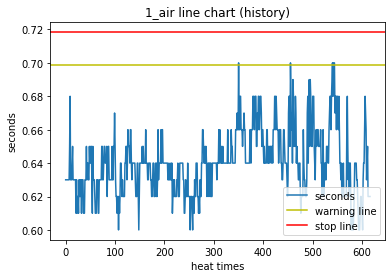

1_airmean: 0.640552845528454
1_airstd: 0.01944724897521789
1_airwarning line: 0.6988945924541077
1_airstop line 0.7183418414293256
-------------------------------------


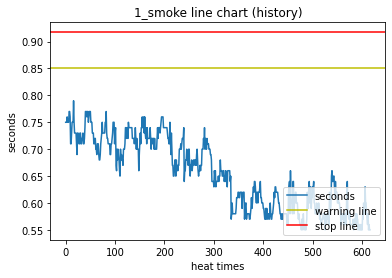

1_smokemean: 0.6533821138211368
1_smokestd: 0.065975086641957
1_smokewarning line: 0.8513073737470078
1_smokestop line 0.9172824603889648
-------------------------------------


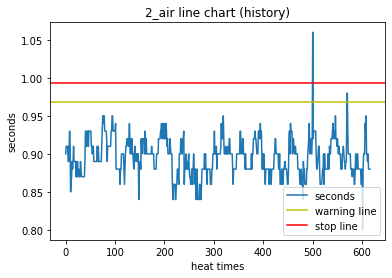

2_airmean: 0.8957235772357703
2_airstd: 0.02424269956701501
2_airwarning line: 0.9684516759368154
2_airstop line 0.9926943755038304
-------------------------------------


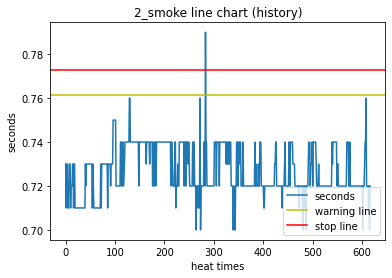

2_smokemean: 0.7269268292683025
2_smokestd: 0.011435394744362906
2_smokewarning line: 0.7612330135013913
2_smokestop line 0.7726684082457542
-------------------------------------


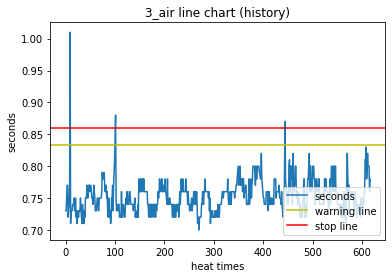

3_airmean: 0.7536585365853651
3_airstd: 0.02657630807597987
3_airwarning line: 0.8333874608133047
3_airstop line 0.8599637688892846
-------------------------------------


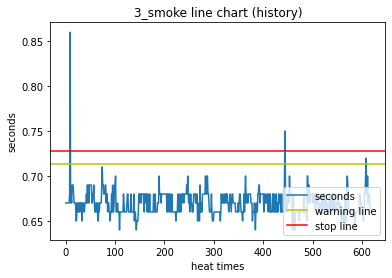

3_smokemean: 0.6696585365853707
3_smokestd: 0.014518790065150288
3_smokewarning line: 0.7132149067808216
3_smokestop line 0.7277336968459718
-------------------------------------


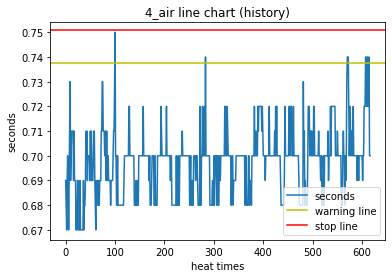

4_airmean: 0.6978048780487786
4_airstd: 0.013234085480725964
4_airwarning line: 0.7375071344909564
4_airstop line 0.7507412199716824
-------------------------------------


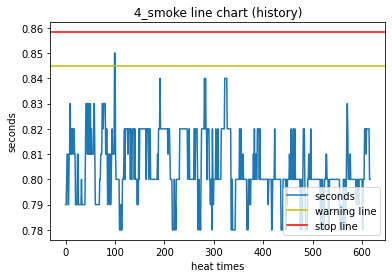

4_smokemean: 0.8046666666666684
4_smokestd: 0.013391296377698168
4_smokewarning line: 0.8448405557997629
4_smokestop line 0.8582318521774611
-------------------------------------


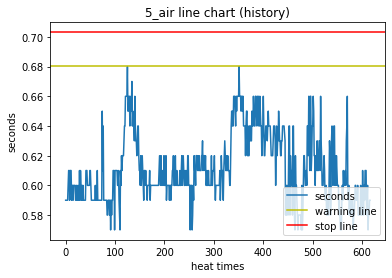

5_airmean: 0.6112357723577226
5_airstd: 0.022973600945522702
5_airwarning line: 0.6801565751942907
5_airstop line 0.7031301761398134
-------------------------------------


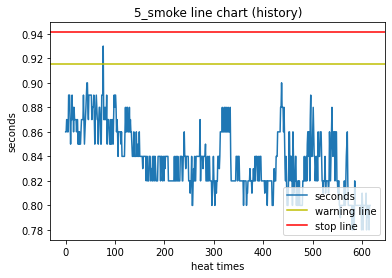

5_smokemean: 0.8374471544715432
5_smokestd: 0.02595699376425172
5_smokewarning line: 0.9153181357642983
5_smokestop line 0.9412751295285501
-------------------------------------


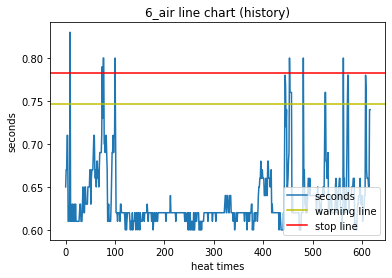

6_airmean: 0.6353170731707335
6_airstd: 0.03695038425993941
6_airwarning line: 0.7461682259505518
6_airstop line 0.7831186102104911
-------------------------------------


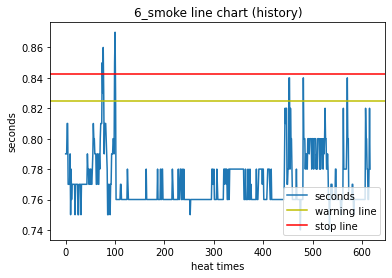

6_smokemean: 0.7713333333333271
6_smokestd: 0.01777101300899605
6_smokewarning line: 0.8246463723603152
6_smokestop line 0.8424173853693113
-------------------------------------


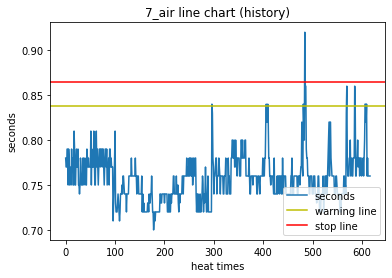

7_airmean: 0.7585365853658513
7_airstd: 0.026631852754834026
7_airwarning line: 0.8384321436303535
7_airstop line 0.8650639963851874
-------------------------------------


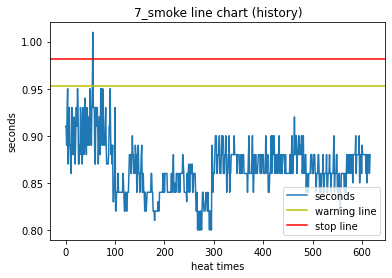

7_smokemean: 0.8669430894308954
7_smokestd: 0.028663298899375165
7_smokewarning line: 0.9529329861290209
7_smokestop line 0.981596285028396
-------------------------------------


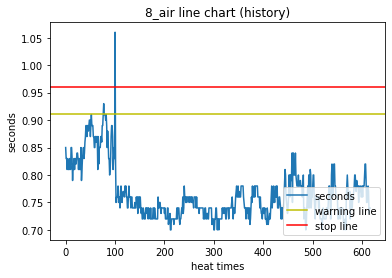

8_airmean: 0.7662113821138209
8_airstd: 0.048577023702569576
8_airwarning line: 0.9119424532215297
8_airstop line 0.9605194769240992
-------------------------------------


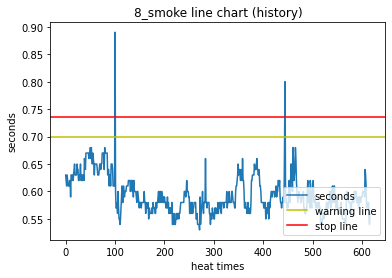

8_smokemean: 0.5943252032520321
8_smokestd: 0.03526297112398777
8_smokewarning line: 0.7001141166239954
8_smokestop line 0.7353770877479832
-------------------------------------


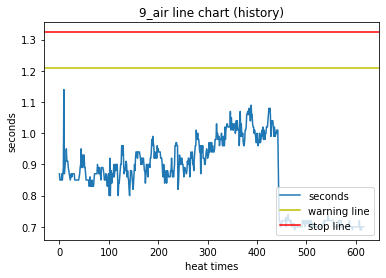

9_airmean: 0.8667804878048799
9_airstd: 0.11424604402914307
9_airwarning line: 1.2095186198923091
9_airstop line 1.3237646639214522
-------------------------------------


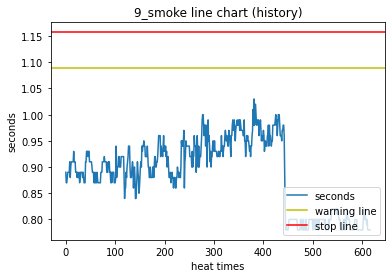

9_smokemean: 0.8880325203252006
9_smokestd: 0.06732341299613893
9_smokewarning line: 1.0900027593136175
9_smokestop line 1.1573261723097563
-------------------------------------


In [ ]:
for i in new_col:
  plt.plot(h5[i])
  plt.title(i + ' line chart (history)')
  plt.xlabel('heat times')
  plt.ylabel('seconds')

  plt.axhline(y = (h5[i].mean() + h5[i].std()*3) , color = 'y', linestyle = '-')
  plt.axhline(y = (h5[i].mean() + h5[i].std()*4), color = 'r', linestyle = '-')
  #plt.axhline(y = 2, color = 'r', linestyle = '-')
  plt.legend(['seconds',  'warning line', 'stop line'], loc='lower right')
  plt.savefig('/content/drive/MyDrive/金屬中心/能專/資料/0826/spc/' + i + ' history curve.png')
  plt.show()

  print(i + 'mean:',h5[i].mean())
  print(i + 'std:', h5[i].std())
  print(i + 'warning line:', (h5[i].mean() + h5[i].std()*3))
  print(i + 'stop line', (h5[i].mean() + h5[i].std()*4))
  print('-------------------------------------')

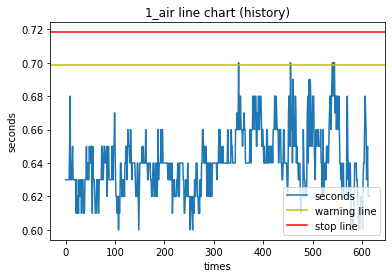

In [ ]:
plt.plot(h5['1_air'])
plt.title('1_air' + ' line chart (history)')
plt.xlabel('times')
plt.ylabel('seconds')

plt.axhline(y = (h5['1_air'].mean() + h5['1_air'].std()*3) , color = 'y', linestyle = '-')
plt.axhline(y = (h5['1_air'].mean() + h5['1_air'].std()*4), color = 'r', linestyle = '-')
#plt.axhline(y = 2, color = 'r', linestyle = '-')
plt.legend(['seconds',  'warning line', 'stop line'], loc='lower right')
plt.show()